# Linear regression [7 pts]

In this homework, you will implement solution algorithms for linear regression.


## Import libraries
Let's begin by importing some libraries.

In [19]:
## Name : Mann Anil Vora
## ASU ID: 1231868809


print(__doc__)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
%matplotlib inline

Automatically created module for IPython interactive environment


## Load dataset

Now, we are importing a dataset of diabetes. You can check the details on this dataset here: https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset.

The dataset consists of 442 observations with 10 attributes ($X$) that may affect the progression of diabetes ($y$). Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of $n$ = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline.

In [3]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print('The shape of the input features:',diabetes_X.shape)
print('The shape of the output varaible:',diabetes_y.shape)

The shape of the input features: (442, 10)
The shape of the output varaible: (442,)


We will choose just one attribute from the ten attributes as an input variable.

In [4]:
# Use only one feature
diabetes_X_one = diabetes_X[:, np.newaxis, 2]
print(diabetes_X_one.shape)

(442, 1)


## Dataset split

Now, we split the dataset into two parts: training set and test set.

- training set: 422 samples
- test set: 20 samples

In [5]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X_one[:-20]
diabetes_X_test = diabetes_X_one[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

print('Training input variable shape:', diabetes_X_train.shape)
print('Test input variable shape:', diabetes_X_test.shape)

Training input variable shape: (422, 1)
Test input variable shape: (20, 1)


## Linear regression

Assume that we have a hypothesis $$ h_{\theta}(x) = \theta_0 + \theta_1 x. $$

Your tasks:

- [3pts] implement \textbf{your own version} of the method of least-squares, compute and report $\theta_0$ and $\theta_1$ that minimize the residual sum of squares, )
$$ \sum_{i=1}^{N} \frac{1}{2}( y^{(i)} - h_{\theta}(x^{(i)})^2$$

[IMPORTANT] Do not just call the least square function from libraries, for example,
scipy.optimize.least_squares from scipy. Doing so will result in 0 point. Using helping functions such as numpy.linalg.inv is okay.

- [3pts] implement your own version of the gradient descent algorithm, compute and report $\theta_0$ and $\theta_1$ that minimize the mean squared error $$ \sum_{i=1}^{N} \frac{1}{N}( y^{(i)} - h_{\theta}(x^{(i)})^2$$

[NOTE] Notice that the loss function is mean-squared error.

- [1pts] derive the analytical expression of the gradient if the loss is defined as
$$ \sum_{i=1}^{N} \frac{1}{2}( y^{(i)} - h_{\theta}(x^{(i)})^2 + \frac{\lambda}{2} \| \theta \|_2^2, $$
where $\theta = [\theta_0, \theta_1]^{\intercal}$

To check whether your computation is correct, consider using an API such as Scikit learn linearregression.

[938.23786125] [152.91886183]


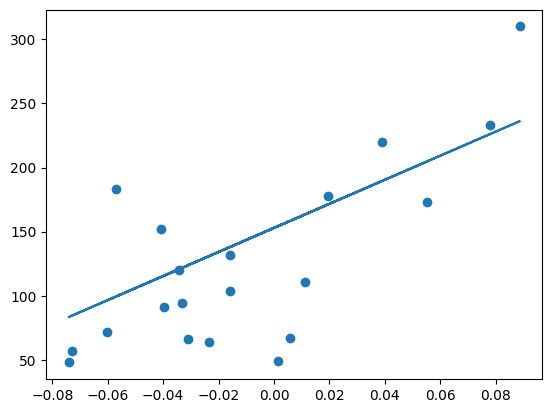

In [10]:
#Question 1: Implemented linear regression from scratch by implementing using class. The fit function is
# used to find the best fit line and predict is used to determine the prediected values

#To obtain this formula, I initially took the hypothesis function and differentiated w.r.t to theta0 and equalized it to 0.
#As a result, I obtained formula Theta0  = (Mean of all values on Y axis) - theta1 * (Mean of all values on X axis)

# Added the above obtained formula in the Hypothesis function, To find the equation of Theta1
# Theta1  = Summation((y(i) - meanof(y)) * (x(i) - meanof(x))) / summation((x(i) - meanof(x))^2)

## Another Formula is the closed form Theta = ((X^T.X)^-1).X^T.y
## This is implemented as an alternate implementation in another half.


class ApnaLinearRegression:
  def __init__(self):
    self.m = None
    self.b = None

  def mHandler(self):
    return self.m

  def bHandler(self):
    return self.b

  def fit(self, X_train, y_train):

    num = 0
    den = 0

    for i in range(X_train.shape[0]):

      num = num + (X_train[i] - X_train.mean()) * (y_train[i] - y_train.mean())
      den = den + (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())

    self.m = num /  den
    self.b = y_train.mean() - (self.m * X_train.mean())

    print(self.m, self.b)

  def predict(self, X_test):
    return self.m * X_test + self.b

lr = ApnaLinearRegression()

lr.fit(diabetes_X_train, diabetes_y_train)

final = lr.predict(diabetes_X_test)

plt.scatter(diabetes_X_test, diabetes_y_test)
plt.plot(diabetes_X_test, final)
plt.show()

In [6]:
#Question 1: Obtaining the values of theta1 and theta0 using the direct closed form formula:

#Finding the values of Theta0 and Theta1 by using the direct formula:
# Using the matrix closed form and finally getting the formula:
# Theta = ((X^T . X) ^ -1) . X^T . y

diabetes_X_matrix = np.c_[np.ones((422, 1)), diabetes_X_train]

X_T = np.transpose(diabetes_X_matrix)
X_T_X = np.dot(X_T, diabetes_X_matrix)
INV = np.linalg.inv(X_T_X)
semi = np.dot(INV, X_T)
theta = np.dot(semi, diabetes_y_train)
print(theta)

[152.91886183 938.23786125]


938.2320613235692 152.9188645705319


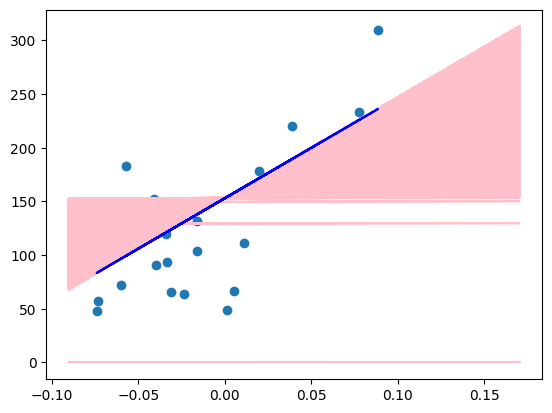

In [18]:
#Question 2: Implemented Gradient Descent by using the formula as mentioned in the Slides provided.

# Learning rate == 0.001. // Used the following formula to find the gradient descent:

# (Theta0)New := (Theta0)Old - LearningRate * slope

## To obtain the formula to changes the values of theta0 and theta1 at each step:

# Did partial derivates with respect to Theta0 and Theta1:

# Formula: theta0 = -2 * summation ((y(i) - theta1 * x(i) - b) * 1)

# Similarly for Theta1, after taking partial derivative
# Theta1 = -2 * summation ((y(i) - theta1 * x(i) - b) * x(i))

m = 0
b = 0
learningRate = 0.001

## No. Of Iterations
epochs = 7000

for i in range(epochs):

    ## Calculating the (learning rate * slope) as per the formula:
    loss_slope = -2 * np.sum(diabetes_y_train - m * diabetes_X_train.ravel() - b)

    ## Finding the current best fit line as per the current values of theta0 and theta1
    y_pred = m * diabetes_X_train + b

    ##Ploting the currently obtained best fit line
    plt.plot(diabetes_X_train, y_pred, color = "pink", label = "Gradient Descent")

    ## Changing the value of Theta1 to new value to minimize the mean squared error
    for j in range(len(diabetes_X_train)):
        delta_m = -2 * (diabetes_y_train[j] - m * diabetes_X_train[j, 0] - b) * diabetes_X_train[j, 0]
        m -= learningRate * delta_m

    ## Changing the value of Theta1 to new value as per the formula to find a better best fit line in the nezt iteration
    b = b - (learningRate * loss_slope)

print(m, b)



plt.scatter(diabetes_X_test, diabetes_y_test)

## This is the best fit line obtained by using the values from the direct formula of theta from Q1.
plt.plot(diabetes_X_test, final, color="blue", label = "direct formula line")
plt.show()